In [7]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:


import pandas as pd 
# Create a pandas DataFrame

df = pd.DataFrame({
    'eye': ['brown', 'green', 'blue', 'blue', 'brown', 'brown'],
    'hair': ['brown', 'blonde', 'red', 'blonde', 'brown', 'blue'],
    'height': [60,       72,       62,    74,       80,      90  ],
    
})

df



,eye,hair,height
0,brown,brown,60
1,green,blonde,72
2,blue,red,62
3,blue,blonde,74
4,brown,brown,80
5,brown,blue,90


In [9]:
df['height'] #select single column
df[['height', 'eye']] #select multiple columns

,height,eye
0,60,brown
1,72,green
2,62,blue
3,74,blue
4,80,brown
5,90,brown


In [8]:
df.dtypes

eye       object
hair      object
height     int64
dtype: object

In [10]:
df['eye'] == 'brown' 

0     True
1    False
2    False
3    False
4     True
5     True
Name: eye, dtype: bool

In [11]:
df ['height'] < 70

0     True
1    False
2     True
3    False
4    False
5    False
Name: height, dtype: bool

In [15]:
df.loc [df ['height'] < 70] #looks at rows that fit the criterion using T/F values


,eye,hair,height
0,brown,brown,60
2,blue,red,62


In [14]:
df.loc [df ['height'] < 70].index #returns the row numbers

Index([0, 2], dtype='int64')

In [17]:
(df ['height'] < 70) & (df['eye'] == 'brown' )

0     True
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [18]:
df ['height'] +20

0     80
1     92
2     82
3     94
4    100
5    110
Name: height, dtype: int64

In [19]:
df.select_dtypes('number')#tells you columns that have number in them

,height
0,60
1,72
2,62
3,74
4,80
5,90


In [20]:
df ['height'].astype(str) + 'inches'

0    60inches
1    72inches
2    62inches
3    74inches
4    80inches
5    90inches
Name: height, dtype: object

In [21]:
df ['height'].quantile([.25, .5, .75])

0.25    64.5
0.50    73.0
0.75    78.5
Name: height, dtype: float64

In [22]:
df ['height'].max()

90

In [23]:
df ['height'].mean()

73.0

In [24]:
df ['height'].std()
df ['height'].max(ddof=0) #changes something about std dev.

11.224972160321824

In [27]:
from fredapi import Fred
fred = Fred(api_key = '5e450d83c52ef0ad9cca37fad13d8fab')
oecd_series = fred.get_series('SPASTT01USM661N', observation_start='1960-01-01', observation_end='2023-07-01')

oecd_series

1960-01-01      3.418156
1960-02-01      3.255919
1960-03-01      3.205570
1960-04-01      3.233542
1960-05-01      3.205570
                 ...    
2023-03-01    141.134556
2023-04-01    145.176059
2023-05-01    142.583249
2023-06-01    145.834377
2023-07-01    150.752045
Length: 763, dtype: float64

In [28]:
cpi_series = fred.get_series('CPIAUCSL', observation_start='1960-01-01', observation_end='2023-07-01')

cpi_series

1960-01-01     29.370
1960-02-01     29.410
1960-03-01     29.410
1960-04-01     29.540
1960-05-01     29.570
               ...   
2023-03-01    301.808
2023-04-01    302.918
2023-05-01    303.294
2023-06-01    303.841
2023-07-01    304.348
Length: 763, dtype: float64

In [32]:
fred_df = pd.DataFrame({
    'OECD': oecd_series,
    'CPI': cpi_series
 })

fred_df

,OECD,CPI
1960-01-01,3.418156,29.370
1960-02-01,3.255919,29.410
1960-03-01,3.205570,29.410
1960-04-01,3.233542,29.540
1960-05-01,3.205570,29.570
...,...,...
2023-03-01,141.134556,301.808
2023-04-01,145.176059,302.918
2023-05-01,142.583249,303.294
2023-06-01,145.834377,303.841


In [33]:
fred_df.loc['2007-01-01']['CPI']


203.437

In [ ]:
fred_df['CPI_adj'] = 1
fred_df['CPI_adj'] = fred_df['CPI']


        Date  Sentiment Index Val
0 1978-01-01                 83.7
1 1978-02-01                 84.3
2 1978-03-01                 78.8
3 1978-04-01                 81.6
4 1978-05-01                 82.9
<bound method NDFrame.head of            Date GOP
0    1871-01-01   1
1    1871-02-01   1
2    1871-03-01   1
3    1871-04-01   1
4    1871-05-01   1
...         ...  ..
1826 2023-03-01   0
1827 2023-04-01   0
1828 2023-05-01   0
1829 2023-06-01   0
1830 2023-07-01   0

[1831 rows x 2 columns]>
     eye    hair  height
0  brown   brown      60
1  green  blonde      72
2   blue     red      62
3   blue  blonde      74
4  brown   brown      80


KeyError: 'GOP'

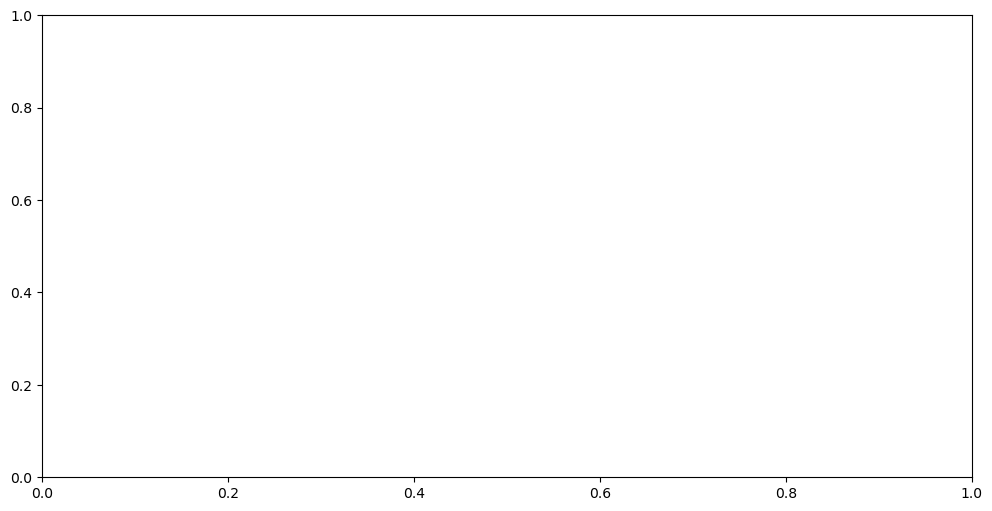

In [12]:
# Set up FRED data connection
# Instructions for getting your FRED API key available at these websites
# https://pypi.org/project/fredapi/ 
# http://api.stlouisfed.org/api_key.html
from fredapi import Fred
fred = Fred(api_key='5e450d83c52ef0ad9cca37fad13d8fab')

temp = fred.get_series('UMCSENT', observation_start='1978-01-01', observation_end='2023-07-01')
df_total_share_price_idx = pd.DataFrame(data = temp, columns=['Sentiment Index Val'])
df_total_share_price_idx = df_total_share_price_idx.rename_axis('Date').reset_index()
print(df_total_share_price_idx.head(5))

# Read in data files 
# GOP term flags
url = "https://github.com/llorracc/as.180.369/blob/main/materials/presidential-term-data/GOP_flag.csv?raw=true"
temp = pd.read_csv(url,dtype=str)
df_gop = pd.DataFrame(temp)

# Add a specific day (e.g., the first day of the month)
df_gop['Date'] = df_gop['Date'] + '.01'

# Convert the complete date string to a datetime object
#df_gop['Date'] = datetime.strptime(df_gop['Date'], '%Y-%m-%d')
df_gop['Date'] = pd.to_datetime(df_gop['Date'])
df_gop['Date'] = df_gop['Date'].dt.normalize()
df_gop['Date'] = df_gop['Date'].dt.floor('D')
print(df_gop.head)

print(df.head(5))

# Plot consumer sentiment. Shade GOP presidential terms
# convenience function
def plot_series(ax, df, index='Date', cols=['Sentiment Index Val'], area='GOP'):
    # convert area variable to boolean
    df[area] = df[area].astype(int).astype(bool)
    # set up an index based on date
    df = df.set_index(keys=index, drop=False)
    # line plot
    df.plot(ax=ax, x=index, y=cols, color='blue', legend=False)
    # extract limits
    y1, y2 = ax.get_ylim()
    ax.fill_between(
        df[index].index, y1=y1, y2=y2, where=df[area], facecolor='tab:red', alpha=0.4
    )
    return ax

# set up figure, axis
f, ax = plt.subplots(figsize=(12, 6))
plot_series(ax, df)
ax.set_title('Consumer sentiment and GOP Presidencies', loc='left')

# ax.grid(visible=False)
ax.grid(axis='y')
ax.set_xlabel('')
ax.set_ylabel('Consumer Sentiment')

